#### Data Collection

In [ ]:
# Performing standard inputs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/House Price Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


EDA-(Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
df.shape

(2000, 10)

In [ ]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:
df.isnull().sum()    # There is no null values

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
print(df.duplicated().sum()) # There is no duplicate values

0


#### Plotting graphs

<Axes: xlabel='Area', ylabel='Price'>

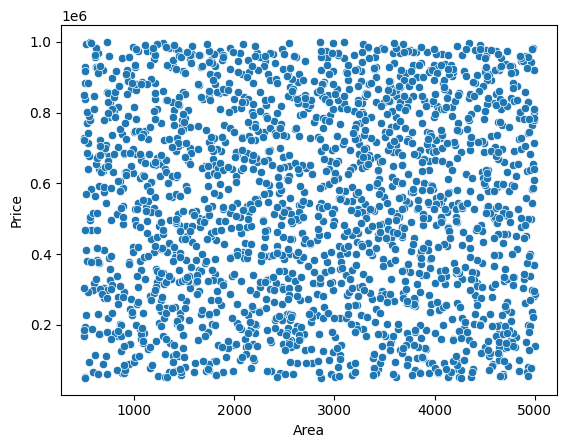

In [ ]:
# Graph of Area vs Price(in Rs.)
sns.scatterplot(x='Area',y='Price', data=df)

<Axes: xlabel='Condition', ylabel='Area'>

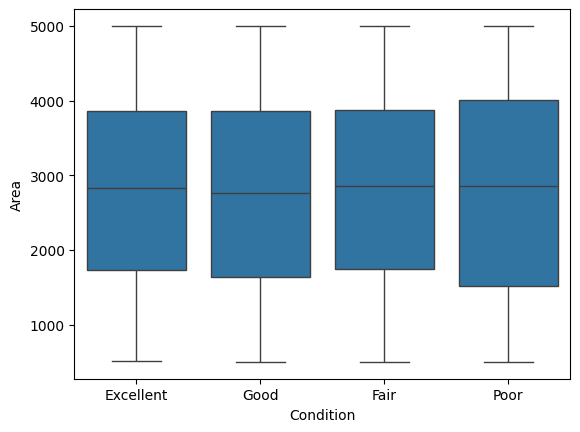

In [ ]:
# Boxplot :  shows max, min, and median for Area
sns.boxplot(x="Condition", y="Area", data=df)

<Axes: xlabel='Condition', ylabel='Price'>

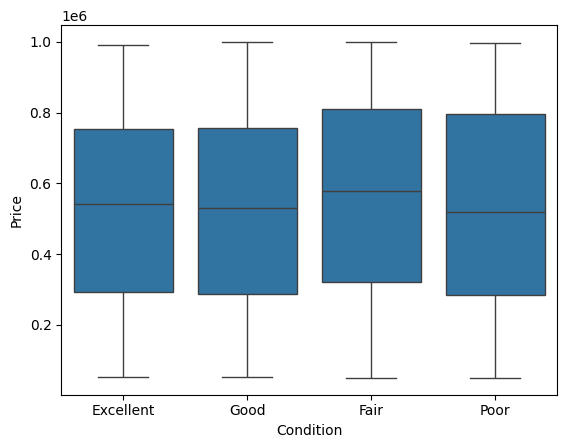

In [ ]:
# Boxplot :  shows max, min, and median for Price
sns.boxplot(x="Condition", y="Price", data=df)

In [ ]:
# Dropped all categorical columns to plot heat map
df = df.drop(["Id", "YearBuilt", "Location", "Condition", "Garage"], axis=1)

<Axes: >

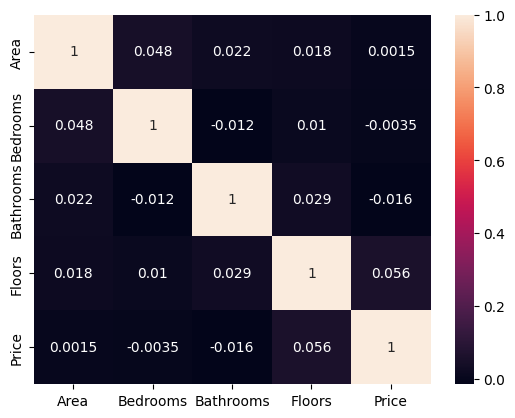

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

<Axes: >

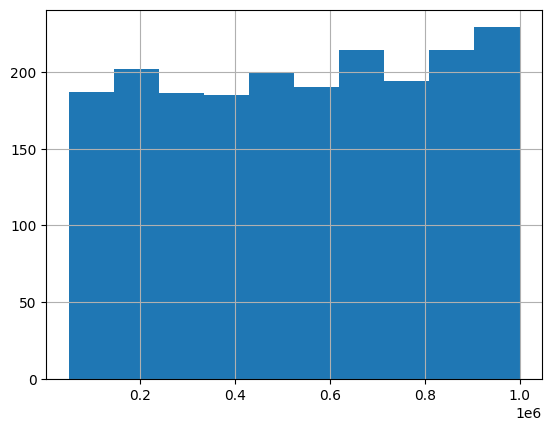

In [ ]:
# Histogram to show the distribution of the prices
df["Price"].hist(bins=10)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Create target column (1 = Expensive, 0 = Not Expensive)
df["expensive"] = (df["Price"] > df["Price"].mean()).astype(int)

In [ ]:
# Features (remove price + target)
X = df.drop(["Price", "expensive"], axis=1)

In [ ]:
# Target
y = df["expensive"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.475

Confusion Matrix:
 [[101  89]
 [121  89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.53      0.49       190
           1       0.50      0.42      0.46       210

    accuracy                           0.47       400
   macro avg       0.48      0.48      0.47       400
weighted avg       0.48      0.47      0.47       400



In [ ]:
# Example new input
new_data = [[3, 2, 1500, 10]]  # Modify these values

# Make prediction
prediction = model.predict(new_data)

# Output result
if prediction[0] == 1:
    print("This house is EXPENSIVE")
else:
    print("This house is NOT expensive")


This house is NOT expensive


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Example new input
new_data = [[3, 2, 1500, 10]]  # Modify these values

# Make prediction
prediction = model.predict(new_data)

# Output result
if prediction[0] == 1:
    print("This house is EXPENSIVE")
else:
    print("This house is NOT expensive")


This house is NOT expensive


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
